In [3]:
import sys
sys.path.insert(0,'../../')
from src.analysis.model_performances import *
import matplotlib.pyplot as plt

In [4]:
answer_type = TRUE_FALSE_ANSWER_TYPE
answer_type_plus = tf_answer_type(score_key = F1_SCORE_KEY)
results_all = collect_stats_all(answer_type_plus)

100%|██████████| 15360/15360 [00:01<00:00, 10401.33it/s]


In [5]:
with open('complexity_by_domain.json') as f:
    complexity_by_domain = json.load(f)

In [6]:
model = 'gemini'#'Llama-2-7b-chat-hf'#'gemma-2b-it' #
prompt_type = 'few_shot_1'
plan_length = 1
ramifications = WITH_RAMIFICATIONS
subs = WITHOUT_RANDOM_SUB
question_category = ALL_QUESTION_CATEGORIES_KEY

In [7]:
by_domain_result = {}
for domain in DOMAIN_NAMES:
    by_domain_result[domain] = filter_single_selector(results_all, plan_length, question_category, ramifications, model, prompt_type, domain, answer_type, subs)

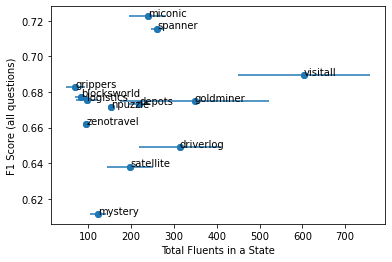

In [12]:
x = [complexity_by_domain[k]['mean'] for k in DOMAIN_NAMES]
x_err = [complexity_by_domain[k]['std'] for k in DOMAIN_NAMES]
y = [by_domain_result[k] for k in DOMAIN_NAMES]
plt.scatter(x, y)
for i, txt in enumerate(DOMAIN_NAMES):
    if x[i] and y[i]:
        # plt.annotate(txt, (x[i]*1.02, y[i]*1.02))
        plt.annotate(txt, (x[i], y[i]))
        

    
plt.errorbar(x, y, xerr=x_err, fmt='o')

# plt.ylim([0,0.15])
plt.xlabel('Total Fluents in a State')
plt.ylabel('F1 Score (all questions)')
plt.savefig(f'complexity_vs_f1.{model}.{prompt_type}.{subs}.pdf')

[0.24731182795698925,
 0.2226950354609929,
 0.2028985507246377,
 0.21215139442231076,
 0.24942528735632183,
 0.2190721649484536,
 0.18681318681318682,
 None,
 None,
 None,
 None,
 None,
 None]